# Explore

Load and explore data a bit

In [1]:
import random
from pathlib import Path
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data

In [2]:
DATA_PATH = Path('../data')

if not DATA_PATH.exists():
    import zipfile, kaggle
    kaggle.api.dataset_download_files('barrettotte/resistors')
    zipfile.ZipFile('resistors.zip').extractall(DATA_PATH)

In [3]:
all_data = pd.read_csv(DATA_PATH / 'train.csv')
all_data['bands'] = all_data['bands'].apply(lambda x: x.split(' '))

print('all: ', all_data.shape)

all:  (1270, 6)


In [4]:
all_data.head(5)

,image,band_count,ohms,tolerance,watts,bands
0,4-band\4B-100K-T5\4B-100K-T5-1.jpg,4,100000.0,0.05,0.25,"[brown, black, yellow, gold]"
1,4-band\4B-100K-T5\4B-100K-T5-10.jpg,4,100000.0,0.05,0.25,"[brown, black, yellow, gold]"
2,4-band\4B-100K-T5\4B-100K-T5-2.jpg,4,100000.0,0.05,0.25,"[brown, black, yellow, gold]"
3,4-band\4B-100K-T5\4B-100K-T5-3.jpg,4,100000.0,0.05,0.25,"[brown, black, yellow, gold]"
4,4-band\4B-100K-T5\4B-100K-T5-4.jpg,4,100000.0,0.05,0.25,"[brown, black, yellow, gold]"


## Data Exploration

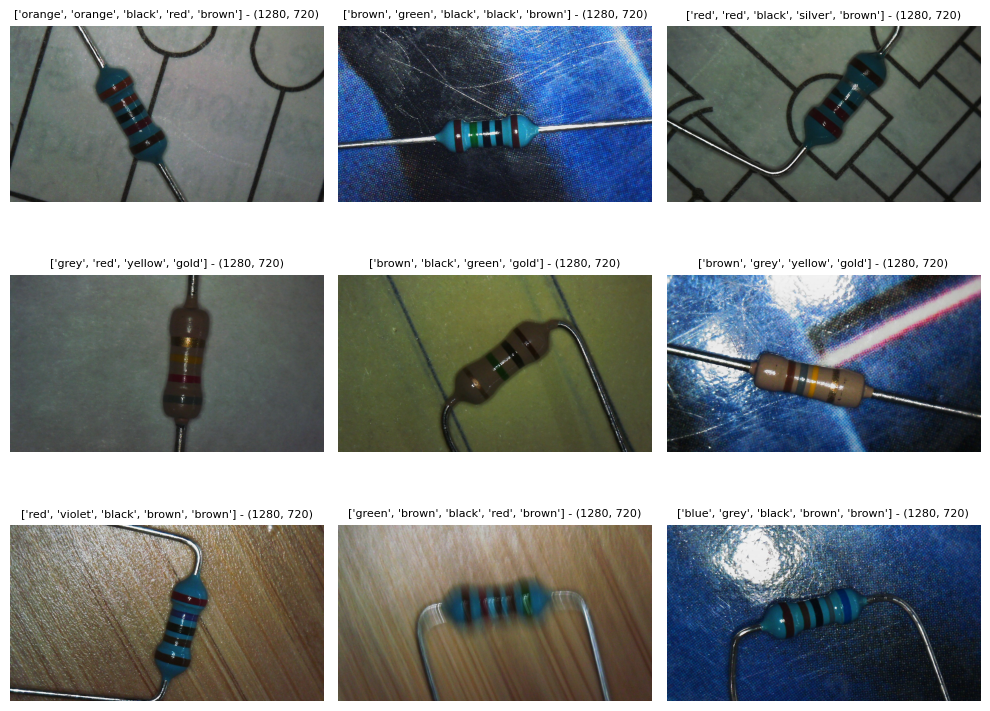

In [6]:
fig = plt.figure(figsize=(10,8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = random.randint(0, len(all_data)-1)
    img = Image.open(DATA_PATH / (all_data['image'][sample_idx]))

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    plt.title(f"{all_data['bands'][sample_idx]} - {img.size}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

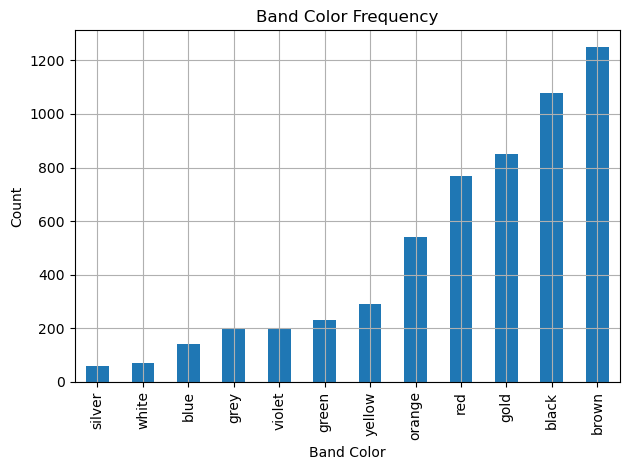

In [7]:
band_counts = all_data['bands'].explode().value_counts()
band_counts = band_counts.sort_values(ascending=True)

band_counts.plot(kind='bar')
plt.title('Band Color Frequency')
plt.xlabel('Band Color')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()

plt.show()

## One-Hot Encoding

In [8]:
colors = ['silver', 'white', 'blue', 'grey', 'violet', 'green', 'yellow', 'orange', 'red', 'gold', 'black', 'brown']

for i in range(1, 5 + 1):
    for color in colors:
        all_data[f'band_{i}_{color}'] = all_data['bands'].apply(lambda x: 1 if len(x) >= i and x[i - 1] == color else 0)

for col, val in all_data.iloc[0].items():
    print(f'{col}: {val}')

image: 4-band\4B-100K-T5\4B-100K-T5-1.jpg
band_count: 4
ohms: 100000.0
tolerance: 0.05
watts: 0.25
bands: ['brown', 'black', 'yellow', 'gold']
band_1_silver: 0
band_1_white: 0
band_1_blue: 0
band_1_grey: 0
band_1_violet: 0
band_1_green: 0
band_1_yellow: 0
band_1_orange: 0
band_1_red: 0
band_1_gold: 0
band_1_black: 0
band_1_brown: 1
band_2_silver: 0
band_2_white: 0
band_2_blue: 0
band_2_grey: 0
band_2_violet: 0
band_2_green: 0
band_2_yellow: 0
band_2_orange: 0
band_2_red: 0
band_2_gold: 0
band_2_black: 1
band_2_brown: 0
band_3_silver: 0
band_3_white: 0
band_3_blue: 0
band_3_grey: 0
band_3_violet: 0
band_3_green: 0
band_3_yellow: 1
band_3_orange: 0
band_3_red: 0
band_3_gold: 0
band_3_black: 0
band_3_brown: 0
band_4_silver: 0
band_4_white: 0
band_4_blue: 0
band_4_grey: 0
band_4_violet: 0
band_4_green: 0
band_4_yellow: 0
band_4_orange: 0
band_4_red: 0
band_4_gold: 1
band_4_black: 0
band_4_brown: 0
band_5_silver: 0
band_5_white: 0
band_5_blue: 0
band_5_grey: 0
band_5_violet: 0
band_5_green: